In [28]:
from sklearn.datasets import make_circles

n = 1000

X, y = make_circles(n, noise=0.05)
X[:5], y[:5]

(array([[ 0.76070264,  0.39445102],
        [ 0.62234037,  0.7953636 ],
        [ 0.50395538, -0.83489459],
        [-0.04294654, -0.99214091],
        [-0.43589889, -0.74006041]]), array([1, 0, 0, 0, 1]))

In [29]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2":X[:, 1], "label":y})
circles.head()

,X1,X2,label
0,0.760703,0.394451,1
1,0.622340,0.795364,0
2,0.503955,-0.834895,0
3,-0.042947,-0.992141,0
4,-0.435899,-0.740060,1


In [30]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

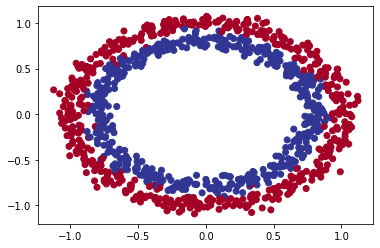

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [32]:
X.shape, y.shape

((1000, 2), (1000,))

In [33]:
import torch

X = torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7607,  0.3945],
         [ 0.6223,  0.7954],
         [ 0.5040, -0.8349],
         [-0.0429, -0.9921],
         [-0.4359, -0.7401]]), tensor([1., 0., 0., 0., 1.]))

In [34]:
X.dtype

torch.float32

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [36]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [38]:
model0 = nn.Sequential(
    nn.Linear(2, 5),
    nn.Linear(5,1)
).to(device)
model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [39]:
untrained_preds = model0(X_test.to(device))
untrained_preds.shape, y_test.shape

(torch.Size([200, 1]), torch.Size([200]))

In [41]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [42]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [43]:
y_logits = model0(X_test.to(device))
y_logits[:5]

tensor([[-0.1398],
        [-0.0722],
        [-0.3144],
        [-0.1998],
        [-0.0602]], grad_fn=<SliceBackward0>)

In [45]:
y_probs = torch.sigmoid(y_logits)
y_probs[:5]

tensor([[0.4651],
        [0.4820],
        [0.4220],
        [0.4502],
        [0.4850]], grad_fn=<SliceBackward0>)

In [48]:
y_preds = torch.round(y_probs)
y_preds[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)